In [2]:
import pandas as pd
import fnmatch
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib
%matplotlib inline

In [10]:
df = pd.read_csv("final_dataset.csv")
df

,Unnamed: 0,Region,Antal,/100 000 inv,Date,Location,Snow_days
0,0,Gotlands län,..,..,1998-12,Forse,21
1,1,Gotlands län,..,..,1998-12,Hejnum,15
2,2,Gotlands län,..,..,1998-12,Hemse,5
3,3,Gotlands län,..,..,1998-12,Hoburg D,4
4,4,Gotlands län,..,..,1998-12,Sanda,9
...,...,...,...,...,...,...,...
33622,33622,Östergötlands län,41,9,2013-03,Tjällmo D,31
33623,33623,Östergötlands län,41,9,2013-03,Vadstena D,4
33624,33624,Östergötlands län,41,9,2013-03,Åkroken D,31
33625,33625,Östergötlands län,41,9,2013-03,Ödeshög D,16


In [11]:
#small_set = df.sample(n=10000, random_state=1)
small_set = df.head(20)
small_set

,Unnamed: 0,Region,Antal,/100 000 inv,Date,Location,Snow_days
0,0,Gotlands län,..,..,1998-12,Forse,21
1,1,Gotlands län,..,..,1998-12,Hejnum,15
2,2,Gotlands län,..,..,1998-12,Hemse,5
3,3,Gotlands län,..,..,1998-12,Hoburg D,4
4,4,Gotlands län,..,..,1998-12,Sanda,9
5,5,Gotlands län,..,..,1998-12,Vänge,8
6,6,Gotlands län,..,..,2002-10,Forse,2
7,7,Gotlands län,..,..,2002-10,Hoburg D,0
8,8,Gotlands län,..,..,2007-11,Austers D,0
9,9,Gotlands län,..,..,2007-11,Forse,25


In [16]:
prev_date = ""
prev_region = ""
snow_count = 0
crime_count = 0
stations_count = 0
max_index = df.shape[0]-1

data = []

for i, row in df.iterrows():
    
    curr_region = row['Region']
    curr_date = row['Date']
    crime = row['Antal']
    snow = row['Snow_days']
    
    if(i == 0):
        prev_date = curr_date
        prev_region = curr_region
        stations_count = 1
    
    if (prev_date != curr_date or prev_region != curr_region):
        converted_date = pd.to_datetime(prev_date, format='%Y-%m', errors='ignore')
        to_append = [prev_region, converted_date, crime_count, (snow_count / stations_count)]
        data.append(to_append)
        
        prev_date = curr_date
        prev_region = curr_region
        
        snow_count = 0
        stations_count = 1
        crime_count = crime
        snow_count = snow
    elif (i == max_index):
        to_append = [prev_region, prev_date, crime_count, (snow_count / stations_count)]
        data.append(to_append)
    else:
        crime_count = crime
        snow_count = snow_count + snow
        stations_count = stations_count + 1
        
        
        
new_df = pd.DataFrame(data, columns=['region', 'date', 'crime_count', 'snow_count'])

/var/folders/cp/4l5cyd252gl8gyd90gw38swr0000gn/T/ipykernel_24045/612772882.py:44: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_df = pd.DataFrame(data, columns=['region', 'date', 'crime_count', 'snow_count'])


In [17]:
new_df

,region,date,crime_count,snow_count
0,Gotlands län,1998-12-01,..,8.857143
1,Gotlands län,2002-10-01,..,1.000000
2,Gotlands län,2007-11-01,..,6.000000
3,Gotlands län,2011-11-01,..,0.000000
4,Gotlands län,2012-02-01,..,22.000000
...,...,...,...,...
2469,Östergötlands län,2008-03-01,40,9.400000
2470,Östergötlands län,2010-01-01,38,29.500000
2471,Östergötlands län,2010-03-01,38,24.941176
2472,Östergötlands län,2012-12-01,38,24.800000


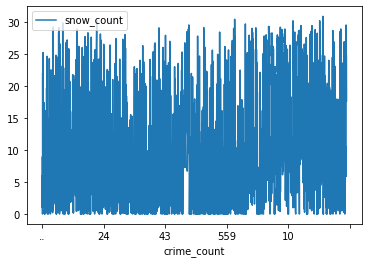

In [18]:
new_df.plot(kind='line', x="crime_count", y="snow_count");

In [19]:
new_df.to_csv("fixed_dataset_050122.csv")